# Inception Model
https://www.indusmic.com/post/how-to-use-inception-model-for-image-recognition

# NÃO EXECUTE NADA, ARQUIVOS PESSOAIS DO PROF.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/ic/imagem/CNN/inception/'


## Introdução




É ma rede Deep Neural Convolucional pré-treinada chamada Inception v3 para classificação de imagem.

O modelo Inception v3 levou semanas para treinar em um super computador com 8 GPUs Tesla K40 que provavelmente custa US$ 30.000 por isso é impossível treiná-lo em um PC comum. Em vez disso, baixaremos o modelo pré-treinado do Inception e usamos para classificar imagens. Usaremos o super computador da DSA e recomendamos que você faça o mesmo.

O modelo Inception v3 tem quase 25 milhões de parâmetros e usa 5 bilhões de operações de multiplicação para classificar uma única imagem. Em um PC moderno sem GPU isso pode ser feito em uma fração de segundo por imagem.

O diagrama a seguir mostra como os dados circulam no modelo Inception v3, que é uma Rede Neural Convolucional com muitas camadas e uma estrutura complicada. O [documento de pesquisa] (http://arxiv.org/pdf/1512.00567v3.pdf) fornece mais detalhes sobre como o modelo Inception foi construído e por que ele foi projetado desse jeito. Mas os autores admitem que eles não entendem por que funciona.

Observe que o modelo Inception tem duas saídas softmax. Um é usado durante o treinamento da rede neural e o outro é usado para classificar imagens após a conclusão do treinamento, também conhecido como inferência.

[Novos modelos] (https://research.googleblog.com/2016/08/improving-inception-and-image.html) ficaram disponíveis recentemente, e são ainda mais complicados do que o Inception v3 e conseguem uma precisão de classificação um pouco melhor.

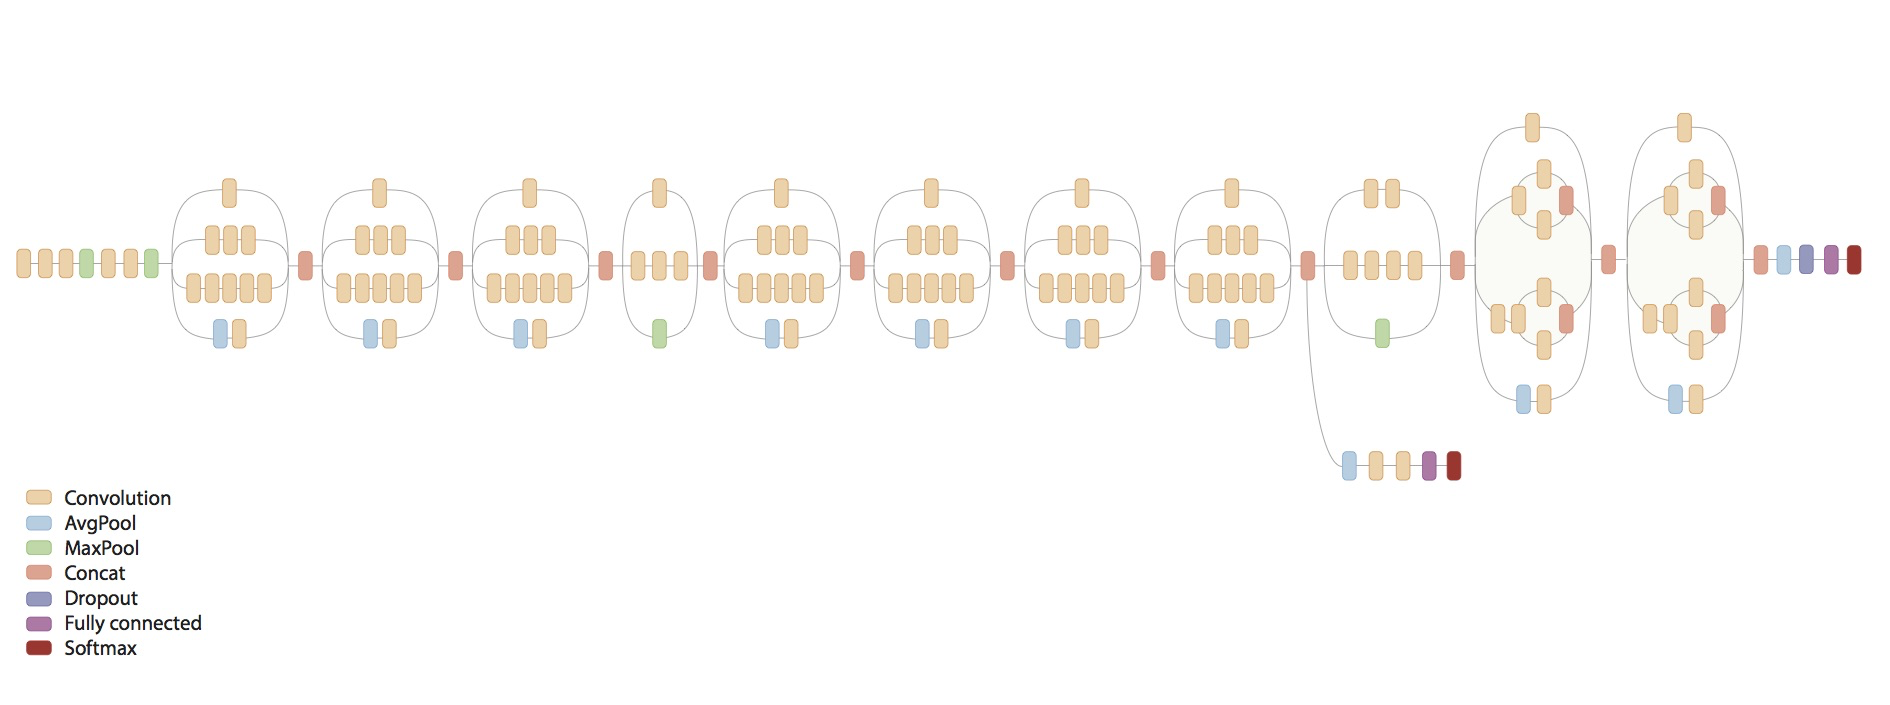

In [ ]:
from IPython.display import Image, display
Image(path+'inception_flowchart.png')

## Importando Bibliotecas

In [ ]:
#!pip list |grep Keras
!pip install Keras-Applications

     |████████████████████████████████| 50 kB 4.0 MB/s 


In [ ]:
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_v3 import preprocess_input, InceptionV3
import numpy as np
import cv2

## Preparando Arquivo

In [ ]:
img_path = path+'tennis-ball01.jpg'
img = load_img(img_path)

In [ ]:
#resize the image to 299x299 square shape
img = img.resize((299,299))
#Convertendo a imagem para array
img_array = img_to_array(img)

In [ ]:
#convert the image into a 4 dimensional Tensor
#convert from (height, width, channels), (batchsize, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

## Processando a Imagem

In [ ]:
#preprocess the input image array
img_array = preprocess_input(img_array)

## Lendo o Modelo

In [ ]:
#Load the model from internet / computer
#approximately 96 MB
pretrained_model = InceptionV3(weights="imagenet")

96124928/96112376 [==============================] - 1s 0us/step


## Fazendo previsão

In [ ]:
#predict using predict() method
prediction = pretrained_model.predict(img_array)
#decode the prediction
actual_prediction = imagenet_utils.decode_predictions(prediction)

print("predicted object is:")
print(actual_prediction[0][0][1])
print("with accuracy")
print(actual_prediction[0][0][2]*100)

49152/35363 [=========================================] - 0s 0us/step
predicted object is:
tennis_ball
with accuracy
99.99544620513916


In [ ]:
#display image and the prediction text over it
disp_img = cv2.imread(img_path)
#display prediction text over the image
cv2.putText(disp_img, actual_prediction[0][0][1], (20,20), cv2.FONT_HERSHEY_TRIPLEX , 0.8, (255,255,255))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
from google.colab.patches import cv2_imshow

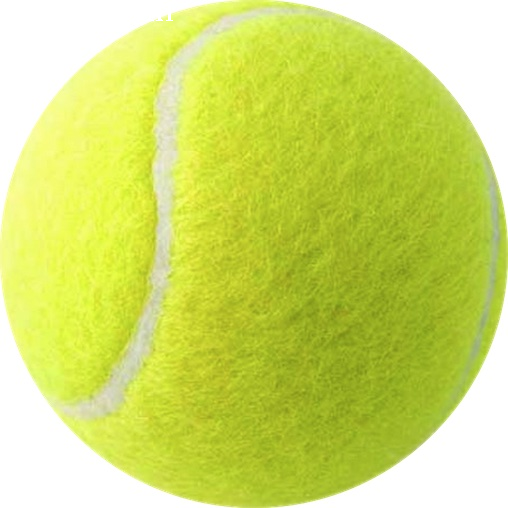

In [ ]:
#show the image
#cv2.imshow("Prediction",disp_img)
cv2_imshow(disp_img)
